In [1]:
from scipy.io import wavfile
import os
import matplotlib.pyplot as plt

import aasi_filters as filters

# Filtering a Single File

In [2]:
filename = os.path.join('GY01', 'S4A03418_20180811_185008.wav')
samplerate, data = wavfile.read(filename)
is_stereo = len(data.shape) == 2
fcutoff = 5000
bwidth = 4000 
order = 1

<ipython-input-2-71dd40ea4f7f>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(filename)


Using Second Order Sections (SOS) is said to have "fewer numerical problems." This is the default filtering method.

## bandstop

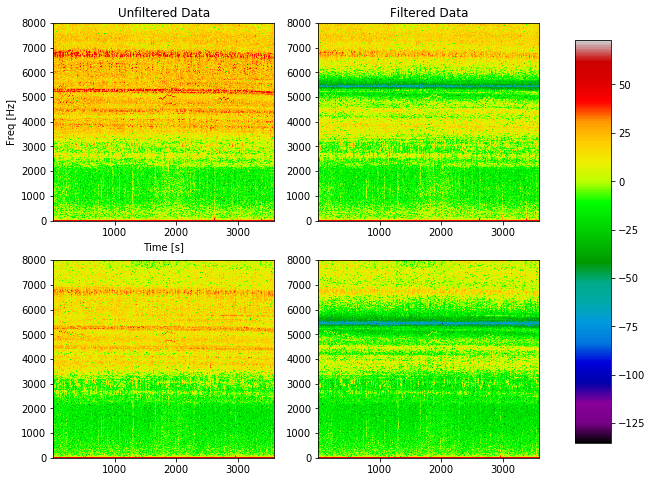

In [4]:
sosfilter = filters.design_bandstop_butter_filter(fcutoff, bwidth, order, samplerate, sos=True)
filt_data_sos = filters.filter(data, sosfilter, stereo=is_stereo)
filters.plot_specgrams(data, filt_data_sos, samplerate, stereo=is_stereo)

## lowpass

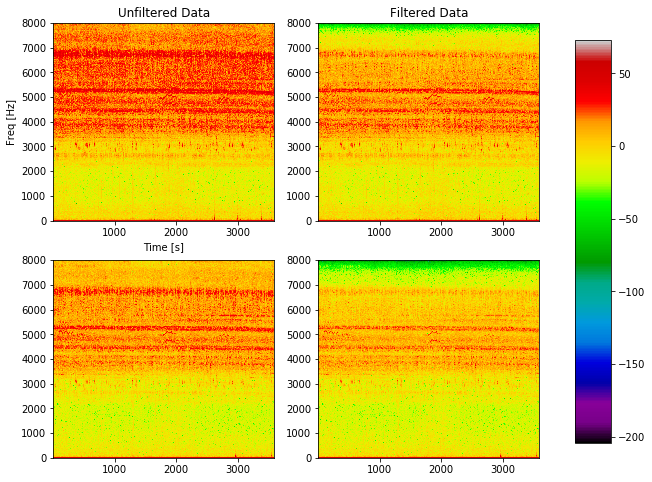

In [4]:
sosfilter = filters.design_lowpass_butter_filter(fcutoff, order, samplerate, sos=True)
filt_data_sos = filters.filter(data, sosfilter, stereo=is_stereo)
filters.plot_specgrams(data, filt_data_sos, samplerate, stereo=is_stereo)

## highpass

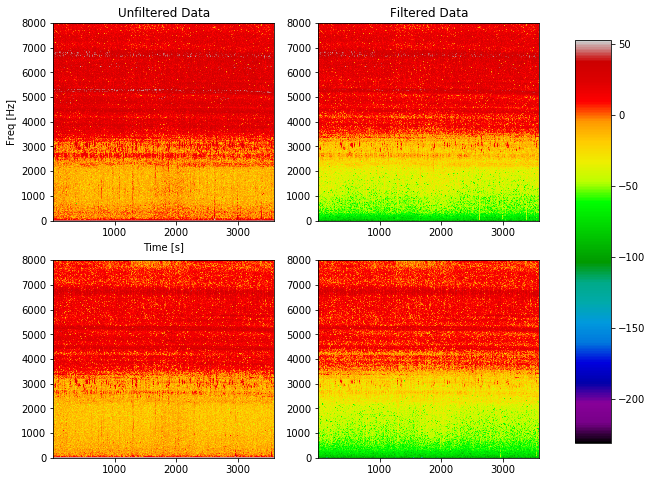

In [5]:
sosfilter = filters.design_highpass_butter_filter(fcutoff, order, samplerate, sos=True)
filt_data_sos = filters.filter(data, sosfilter, stereo=is_stereo)
filters.plot_specgrams(data, filt_data_sos, samplerate, stereo=is_stereo)

# Filtering Directory of .wav files
Only need to specify directory name relative to current directory. 
Optionally, you can enter a new directory to save filtered data to, using the same file names as the original data.

## bandstop

In [4]:
#specify list of frequencies to filter the signals at
example_dir = 'GY01'
fcenter = [5000]
signals = filters.filter_all_files(example_dir, fcenter, order=order, new_dirname='bandstop_output', ftype='bandstop', bandwidth=4000)

/Users/juan/Documents/CSE/145/proj/aasi_filters.py:174: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, sig = wavfile.read(os.path.join(dirname, filename))


## lowpass/ highpass

In [5]:
ftype='lowpass'
signals = filters.filter_all_files(example_dir, fcutoff, order=order, new_dirname='lowpass_output', ftype=ftype)

ftype='highpass'
filters.filter_all_files(example_dir, fcutoff, order=order, new_dirname='HPF_1000_Hz', ftype=ftype)

{'S4A03418_20180811_185008.wav': array([[ 5.85768024e-02,  2.67292349e-03],
        [ 1.45654840e+03,  1.78302356e+02],
        [-1.48004914e+03, -5.47931719e+02],
        ...,
        [-2.23310401e+03, -6.11465832e+02],
        [ 5.04920003e+02,  5.48036112e+02],
        [-3.39267112e-02,  2.14456571e-02]])}